In [1]:
from pyDOE import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
import pandas as pd
import os.path
modulepath = os.path.expanduser('~/Documents/modelling/6eq/parameter_space_search')  # os.path.expanduser(path) : return the argument with an initial component of ~ or ~user replaced by that user’s home directory.


In [2]:
def loguniform(low=-3, high=3, size=None):
    return (10)**(np.random.uniform(low, high, size))
def uniform(low=-3, high=3, size=None):
    return np.random.uniform(low,high, size)

# Random Sampling from loguniform distribution

In [3]:

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(loguniform(size=1000),loguniform(size=1000),loguniform(size=1000))

In [4]:
# plt.bar(loguniform(size=1000),1)

# Latin hypercube sampling from loguniform distribution

In [5]:
# data = np.column_stack((loguniform(size=100000),loguniform(size=100000),loguniform(size=100000)))


def lhs(data,nsample):
    m,nvar = data.shape
    ran=np.random.uniform(size=(nsample,nvar))
    s=np.zeros((nsample,nvar))
    for j in range(0,nvar):
        idx=np.random.permutation(nsample)+1
        P=((idx-ran[:,j])/nsample)*100
        s[:,j]= np.percentile(data[:,j],P)
    return s
        
# points = lhs(data,1000)
# print(points)


In [6]:
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(points[:,0], points[:,1], points[:,2])

In [7]:
# plt.bar(points[:,0],1)


#  Generating parameter distributions (Ranges)


In [8]:
loguniformdist = loguniform(size=1000000)


Create distribution with ranges

In [9]:
b_range = (0.01,1)
Vm_range = (10,1000)
km_range = (0.1,250)
mu_range = (0.001,50)

b_distribution = [x for x in loguniformdist if b_range[0] <= x <= b_range[1]]
Vm_distribution = [x for x in loguniformdist if Vm_range[0] <= x <= Vm_range[1]]
km_distribution = [x for x in loguniformdist if km_range[0] <= x <= km_range[1]]
mu_distribution = [x for x in loguniformdist if mu_range[0] <= x <= mu_range[1]]



lenghtsdistributions = (len(b_distribution), len(Vm_distribution), len(km_distribution), len(mu_distribution))
minimumlenghtdistribution = np.amin(lenghtsdistributions)
b_distribution=b_distribution[:minimumlenghtdistribution]
Vm_distribution=Vm_distribution[:minimumlenghtdistribution]
km_distribution=km_distribution[:minimumlenghtdistribution]
mu_distribution=mu_distribution[:minimumlenghtdistribution]



In [10]:
# sns.set(style="white", palette="muted", color_codes=True)


# fig,ax=plt.subplots(2,2,figsize=(7,7))
# sns.despine(left=True)

# sns.distplot(b_distribution, color="c", ax=ax[0, 0])
# sns.distplot(Vm_distribution, color="m", ax=ax[0, 1])
# sns.distplot(km_distribution, color="g", ax=ax[1, 0])
# sns.distplot(mu_distribution, color="k", ax=ax[1, 1])

# parameterclasstitle = ('Basal production (nM/h)', 'Induced Maximum production rate(nM/h)', 'Michaelis-Menten Constant (nM)', 'Degradation rate (1/h)')
# parameterclass = (b_range,Vm_range,km_range,mu_range)
# count=0
# for ax in ax.flat:
#     ax.set_title(parameterclasstitle[count], fontweight='bold')
#     ax.set( xlabel = 'parameter values', ylabel='frequency')
#     ax.set_xlim(parameterclass[count][0],int(parameterclass[count][1]))

#     count+=1
    
# fig.tight_layout()
# # plt.savefig('thesisfigures/parameterdistributions')

Carry out LHS with defined ranges

In [11]:
# datadistributions = np.column_stack((b_distribution,Vm_distribution, km_distribution))

# datadistributions.shape
# data = np.column_stack((loguniform(size=100000),loguniform(size=100000),loguniform(size=100000)))

# print(data.shape,datadistributions.shape)



In [12]:
# points=lhs(datadistributions,10000)


In [13]:
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(points[:,0], points[:,1], points[:,2])

# Generating parameter combinations

In [14]:
#A general matrix is generated with the distributions for each parameter

b_matrix = np.column_stack((b_distribution,b_distribution,b_distribution,b_distribution,b_distribution,b_distribution))
Vm_matrix = np.column_stack((Vm_distribution,Vm_distribution,Vm_distribution,Vm_distribution,Vm_distribution,Vm_distribution))
mu_matrix = np.column_stack((mu_distribution,mu_distribution,mu_distribution))
km_matrix = np.column_stack((km_distribution,km_distribution,km_distribution,km_distribution,km_distribution,km_distribution,km_distribution))

par_distribution_matrix =np.concatenate((b_matrix,Vm_matrix,mu_matrix,km_matrix),1)


In [15]:
numbercombinations = 5
points=lhs(par_distribution_matrix,numbercombinations)
points.shape
print(points)

[[1.57892806e-02 1.48498837e-01 8.31859158e-01 7.17755121e-01
  6.41895106e-01 1.65110732e-02 1.25055008e+02 1.74297002e+01
  1.96822525e+02 1.51685100e+02 5.35519130e+02 6.77061856e+01
  4.47223808e+01 2.16995602e+01 1.28864435e-02 1.05586092e+01
  7.44453381e+01 2.73472204e+01 7.60770725e+00 1.48557993e+02
  2.26415932e+01 5.93306009e+00]
 [6.72433196e-01 3.91715043e-02 2.52924153e-02 4.07406637e-02
  3.08017048e-01 1.12633204e-01 1.78468162e+01 2.60326265e+02
  5.97679539e+01 6.24780551e+01 1.84458023e+02 3.09115589e+02
  5.74497816e-02 2.02913802e-02 1.63723567e+00 1.10743777e+02
  3.46215901e+01 7.89939953e-01 2.20223322e+01 1.98807676e-01
  7.32595948e+01 2.01575333e+02]
 [3.27144921e-01 1.16420752e-02 1.35087821e-01 1.02405555e-02
  2.17968798e-02 9.61605211e-01 2.44309740e+02 4.03833313e+01
  7.09502420e+02 2.80791514e+02 2.01495508e+01 5.72435882e+02
  2.77538216e-01 5.07034338e+00 6.15568483e-03 1.94202735e+00
  6.94411639e+00 3.32588700e-01 1.53263109e+02 1.55361618e+01
  4.

In [16]:
cooperativity = np.full((numbercombinations, 1), 2)

######################################################################################################
#OLD PARAMETER SET WITH OLD DIFFUSION CONSTANTS (USED IN MRES)
# d_A = np.full((numbercombinations, 1), 0.789)
# d_A.shape
# d_B = np.full((numbercombinations, 1), 0.511)
######################################################################################################

d_A = np.full((numbercombinations, 1), 2.16)
d_A.shape
d_B = np.full((numbercombinations, 1), 0.81)
parameterindex = np.arange(1,numbercombinations+1, dtype=np.int).reshape(numbercombinations,1)
points = np.concatenate((parameterindex,points,d_A,d_B,cooperativity),1)

print(points)

[[1.00000000e+00 1.57892806e-02 1.48498837e-01 8.31859158e-01
  7.17755121e-01 6.41895106e-01 1.65110732e-02 1.25055008e+02
  1.74297002e+01 1.96822525e+02 1.51685100e+02 5.35519130e+02
  6.77061856e+01 4.47223808e+01 2.16995602e+01 1.28864435e-02
  1.05586092e+01 7.44453381e+01 2.73472204e+01 7.60770725e+00
  1.48557993e+02 2.26415932e+01 5.93306009e+00 2.16000000e+00
  8.10000000e-01 2.00000000e+00]
 [2.00000000e+00 6.72433196e-01 3.91715043e-02 2.52924153e-02
  4.07406637e-02 3.08017048e-01 1.12633204e-01 1.78468162e+01
  2.60326265e+02 5.97679539e+01 6.24780551e+01 1.84458023e+02
  3.09115589e+02 5.74497816e-02 2.02913802e-02 1.63723567e+00
  1.10743777e+02 3.46215901e+01 7.89939953e-01 2.20223322e+01
  1.98807676e-01 7.32595948e+01 2.01575333e+02 2.16000000e+00
  8.10000000e-01 2.00000000e+00]
 [3.00000000e+00 3.27144921e-01 1.16420752e-02 1.35087821e-01
  1.02405555e-02 2.17968798e-02 9.61605211e-01 2.44309740e+02
  4.03833313e+01 7.09502420e+02 2.80791514e+02 2.01495508e+01
  5.

In [17]:
parameternames = ('index','ba','bb','bc','bd','be','bf','Va','Vb','Vc','Vd','Ve','Vf','mua','mub','mulva','kaa','kda','keb','kbd','kce','kfe','kee','d_A','d_B','n')
df = pd.DataFrame(data=points, columns = parameternames)
df['index'] = df['index'].astype(int)
df['n'] = df['n'].astype(int)
df = df.set_index('index')
df

,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,kaa,kda,keb,kbd,kce,kfe,kee,d_A,d_B,n
index,,,,,,,,,,,,,,,,,,,,,
1,0.015789,0.148499,0.831859,0.717755,0.641895,0.016511,125.055008,17.429700,196.822525,151.685100,...,10.558609,74.445338,27.347220,7.607707,148.557993,22.641593,5.933060,2.16,0.81,2
2,0.672433,0.039172,0.025292,0.040741,0.308017,0.112633,17.846816,260.326265,59.767954,62.478055,...,110.743777,34.621590,0.789940,22.022332,0.198808,73.259595,201.575333,2.16,0.81,2
3,0.327145,0.011642,0.135088,0.010241,0.021797,0.961605,244.309740,40.383331,709.502420,280.791514,...,1.942027,6.944116,0.332589,153.263109,15.536162,4.180187,26.466891,2.16,0.81,2
4,0.027230,0.363435,0.385401,0.375439,0.032998,0.052927,440.197044,118.477149,147.699200,19.505802,...,0.376146,0.164158,8.068705,0.184163,0.487998,0.789922,0.114136,2.16,0.81,2
5,0.134412,0.671254,0.014711,0.093794,0.147502,0.372865,36.448274,817.344457,22.552488,813.858586,...,29.214530,1.057769,241.698067,1.674637,8.563348,0.123647,1.394166,2.16,0.81,2


In [93]:
df.to_pickle('parameterfiles/pandasparametertest253.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'parameterfiles/pandasparametertest253.pkl'

# Different sampling techniques

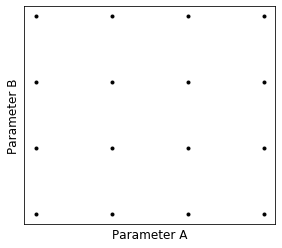

In [80]:
fig, axs = plt.subplots(figsize=(4.5,4))

xvalues = np.array([0, 1, 2, 3]);
yvalues = np.array([0, 1, 2, 3]);
xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')
plt.xticks([])
plt.yticks([])
plt.xlabel('Parameter A',fontsize = 12)
plt.ylabel('Parameter B', fontsize = 12)

plt.savefig('thesisfigures/gridsampling.png')


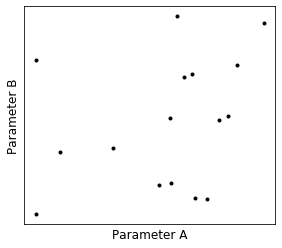

In [81]:
fig, axs = plt.subplots(figsize=(4.5,4))

n_points = 16
plt.plot(uniform(size=n_points),uniform(size=n_points),marker='.', color='k', linestyle='none')
plt.xticks([])
plt.yticks([])
plt.xlabel('Parameter A',fontsize = 12)
plt.ylabel('Parameter B', fontsize = 12)
plt.savefig('thesisfigures/randomsampling.png')



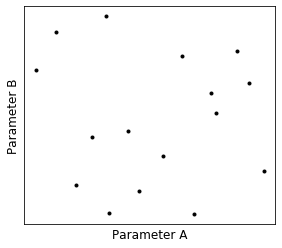

In [83]:
fig, axs = plt.subplots(figsize=(4.5,4))

data = np.column_stack((uniform(size=100000),uniform(size=100000)))
points = lhs(data,n_points)

plt.plot(points[:,0], points[:,1], marker='.', color='k', linestyle='none')
plt.xticks([])
plt.yticks([])
plt.xlabel('Parameter A',fontsize = 12)
plt.ylabel('Parameter B', fontsize = 12)
plt.savefig('thesisfigures/lhssampling.png')

